# Manipulación y limpieza de datos
Usualmente los datos no vienen en una buena presentación, pueden traer valores nulos, valores erróneos según el campo o no estar en el formato que nos gustaría para poder realizar un análisis.

## Aplicación
En este ejemplo utilizaremos el dataset *Iris* y algunos otros pequeños ejemplos.

Librerías que vamos a usar, en caso de no contar con ellas podemos instalarlas.

In [5]:
pip install numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


Cargar el dataset *Iris* de la librería sklearn

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

Para observar la información de un dataset 

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Ahora sabemos que tiene 50 entradas, 4 columnas, no hay valores nulos y todos son valores numéricos tipo float.
Ahora, vamos a ver un poco de los datos.
Usaremos iris_df.head(), el paréntesis puede ir vacío y nos mostrará las primeras 5 o si queremos un número de filas específico, podemos escribirlo dentro del paréntesis.

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Con iris_df.tail() podemos igualmente ver sólo los último 5 si se deja vacío o algún número en particular.

In [11]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [12]:
iris_df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


## Para la falta de datos 
En el caso de que tengamos un arreglo con un dato None, entonces el tipo de datos en vez de que sea integer o float, pasa a ser un objeto.

In [14]:
ejemplo1 = np.array([2, None, 6, 8])
ejemplo1

array([2, None, 6, 8], dtype=object)

El hecho de que este None en nuestro arreglo nos límita en las operaciones que podemos realizar con él.

In [15]:
ejemplo1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [17]:
ejemplo1.min()

TypeError: '<=' not supported between instances of 'int' and 'NoneType'

In [18]:
ejemplo1.max()

TypeError: '>=' not supported between instances of 'int' and 'NoneType'

Aunque NaN se usa cuando se tienen arreglos con valores numércios de tipo float, los resultados de las mismas operaciones de arriba resultan en Nan.

In [20]:
ejemplo2 = np.array([2, np.nan, 6, 8])
ejemplo2.sum(), ejemplo2.min(), ejemplo2.max()

(nan, nan, nan)

## Detectando valores nulos

In [21]:
#Primero ponemos un ejemplo de un arreglo con NaN y None
ejemplo3 =pd.Series([0, np.nan, '', None])
ejemplo3.isnull()

0    False
1     True
2    False
3     True
dtype: bool

## Quitando los valores nulos

In [22]:
ejemplo3 = ejemplo3.dropna()
ejemplo3

0    0
2     
dtype: object

In [23]:
ejemplo4 = pd.DataFrame([[1, np.nan, 7],
                        [2, 5, 8],
                        [np.nan, 6, 9]])
ejemplo4

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


In [24]:
ejemplo4.dropna()

,0,1,2
1,2.0,5.0,8


In [25]:
#O se pueden eliminar las NA de las columnas
ejemplo4.dropna(axis='columns')

,2
0,7
1,8
2,9


In [28]:
#También podemos añadir una columna con sola NaN
ejemplo4[3] = np.nan
ejemplo4

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


In [34]:
#En este caso podemos ver filas con un número limitado de valores no nulos.
ejemplo4.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,5.0,8,NaN


## Llenando valores nulos
Primero vamos a crear una nueva serie en pandas con diferentes valores.

In [35]:
ejemplo5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
ejemplo5

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [36]:
#Podemos llenar los vacíos con un número en específico, como cero
ejemplo5.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [37]:
#Otra forma de llenarlo es usar el método ffill, llena los datos con el dato anterior.
ejemplo5.fillna(method='ffill')

C:\Users\Maria\AppData\Local\Temp\ipykernel_7768\3222830133.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ejemplo5.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [38]:
#O puede ser bfill para llenar con el dato siguiente.
ejemplo5.fillna(method='bfill')

C:\Users\Maria\AppData\Local\Temp\ipykernel_7768\1628484687.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ejemplo5.fillna(method='bfill')


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [40]:
#O podemos especificar con que eje queremos llenar los null.
ejemplo4.fillna(method='ffill', axis=1)

C:\Users\Maria\AppData\Local\Temp\ipykernel_7768\2538184209.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ejemplo4.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,7.0,7.0
1,2.0,5.0,8.0,8.0
2,NaN,6.0,9.0,9.0


In [41]:
#O podríamos llenar la información con un valor basado en el resto de los que pertenecen al dataframe.
ejemplo4.fillna(ejemplo4.mean())

,0,1,2,3
0,1.0,5.5,7,NaN
1,2.0,5.0,8,NaN
2,1.5,6.0,9,NaN


In [43]:
#Observamos dos cosas, una es que sí no hay datos en la siguiente fila y usamos ffill para llenar, 
#los valores quedarán nulos, por ptrp lado, al usar fillna, la dirección predeterminada es la de las 
#filas.

## Quitando datos duplicados 

In [44]:
ejemplo6 = pd.DataFrame({'letters':['A', 'B']*2+['B'],
                         'numbers':[1, 2, 1, 3, 3]})
ejemplo6

,letters,numbers
0,A,1
1,B,2
2,A,1
3,B,3
4,B,3


In [46]:
#Lo siguiente nos indica cuáles valores están duplicados, True si sí lo están y False si no.
ejemplo6.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [47]:
#Las funciones duplicated y dro_duplicates considera por default las columnas, pero podemos especificar
#alguna columna quu queremos.
ejemplo6.drop_duplicates(['letters'])

,letters,numbers
0,A,1
1,B,2


## Combinando datos: merge y join

Join uno a uno

In [59]:
#Definimos nuestros dos conjuntos con los que trabajaremos.
df1 = pd.DataFrame({'empleados':['Gary', 'Stu', 'Mary', 'Sue'],
                    'grupo':['Contabilidad', 'Marketing', 'Marketing', 'RRHH']})
df1

,empleados,grupo
0,Gary,Contabilidad
1,Stu,Marketing
2,Mary,Marketing
3,Sue,RRHH


In [60]:
df2 = pd.DataFrame({'empleados': ['Mary', 'Stu', 'Gary', 'Sue'],
                    'fecha_contr':[2008, 2012, 2017, 2018]})
df2

,empleados,fecha_contr
0,Mary,2008
1,Stu,2012
2,Gary,2017
3,Sue,2018


In [61]:
#Para combinar ambos conjuntos de datos en uno sólo, usaremos la función merge, la cuál buscará lo 
#que hay en común entre ambos conjuntos.
df3 = pd.merge(df1, df2)
df3

,empleados,grupo,fecha_contr
0,Gary,Contabilidad,2017
1,Stu,Marketing,2012
2,Mary,Marketing,2008
3,Sue,RRHH,2018


Join muchos a uno

In [62]:
#Definimos un nuevo conjunto
df4 = pd.DataFrame({'grupo':['Contabilidad', 'Marketing', 'RRHH'],
                    'supervisor': ['Carlos', 'Giada', 'Stephanie']})
df4

,grupo,supervisor
0,Contabilidad,Carlos
1,Marketing,Giada
2,RRHH,Stephanie


In [63]:
pd.merge(df3, df4)

,empleados,grupo,fecha_contr,supervisor
0,Gary,Contabilidad,2017,Carlos
1,Stu,Marketing,2012,Giada
2,Mary,Marketing,2008,Giada
3,Sue,RRHH,2018,Stephanie


In [64]:
#Podemos especificar en que columna queremos que haga el join
pd.merge(df3, df4, on='grupo')

,empleados,grupo,fecha_contr,supervisor
0,Gary,Contabilidad,2017,Carlos
1,Stu,Marketing,2012,Giada
2,Mary,Marketing,2008,Giada
3,Sue,RRHH,2018,Stephanie


Join muchos a muchos

In [65]:
#Cuando tenemos datos duplicados en ambos conjuntos que queremos aplicar un join, se vuelve un caso 
#de muchos a muchos.
df5 = pd.DataFrame({'grupo':['Contabilidad', 'Contabilidad', 'Marketing', 'Marketing', 'RRHH', 'RRHH'],
                    'habilidades':['matemáticas', 'hojas de cálculo', 'escritura', 'comunicación', 
                                   'hojas de cálculo', 'organización']})
df5

,grupo,habilidades
0,Contabilidad,matemáticas
1,Contabilidad,hojas de cálculo
2,Marketing,escritura
3,Marketing,comunicación
4,RRHH,hojas de cálculo
5,RRHH,organización


In [66]:
pd.merge(df1, df5, on = 'grupo')

,empleados,grupo,habilidades
0,Gary,Contabilidad,matemáticas
1,Gary,Contabilidad,hojas de cálculo
2,Stu,Marketing,escritura
3,Stu,Marketing,comunicación
4,Mary,Marketing,escritura
5,Mary,Marketing,comunicación
6,Sue,RRHH,hojas de cálculo
7,Sue,RRHH,organización


`left_on` y `right_on`

In [68]:
#Supongamos el caso en que aunque dos columnas tienen la misma información o datos cada una 
#de diferente conjunto, pero tienen un nombre de columna distinto.

df6 = pd.DataFrame({'nombre':['Gary', 'Stu', 'Mary', 'Sue'],
                    'salario':[70000, 80000, 120000, 90000]})
df6

,nombre,salario
0,Gary,70000
1,Stu,80000
2,Mary,120000
3,Sue,90000


In [69]:
pd.merge(df1, df6, left_on="empleados", right_on="nombre")

,empleados,grupo,nombre,salario
0,Gary,Contabilidad,Gary,70000
1,Stu,Marketing,Stu,80000
2,Mary,Marketing,Mary,120000
3,Sue,RRHH,Sue,90000


In [71]:
#También podemos hacer joins con el índice de nuestros dataframes
df1a = df1.set_index('empleados')
df1a

,grupo
empleados,
Gary,Contabilidad
Stu,Marketing
Mary,Marketing
Sue,RRHH


In [72]:
df2a = df2.set_index('empleados')
df2a

,fecha_contr
empleados,
Mary,2008
Stu,2012
Gary,2017
Sue,2018


In [75]:
#Entonces utilizamos merge
pd.merge(df1a, df2a, left_index=True, right_index=True)

,grupo,fecha_contr
empleados,,
Gary,Contabilidad,2017
Stu,Marketing,2012
Mary,Marketing,2008
Sue,RRHH,2018


In [76]:
#Otro método para hacer un join con índices es el siguiente
df1a.join(df2a)

,grupo,fecha_contr
empleados,,
Gary,Contabilidad,2017
Stu,Marketing,2012
Mary,Marketing,2008
Sue,RRHH,2018


In [78]:
#Y podemos mezclar index con on.
pd.merge(df1a, df6, left_index=True, right_on='nombre')

,grupo,nombre,salario
0,Contabilidad,Gary,70000
1,Marketing,Stu,80000
2,Marketing,Mary,120000
3,RRHH,Sue,90000


Operaciones entre conjuntos para join

In [81]:
df5 = pd.DataFrame({'grupo': ['Ingeniería', 'Marketing', 'Ventas'],
                    'habilidades':['matemáticas', 'escritura', 'comunicación']})
df5

,grupo,habilidades
0,Ingeniería,matemáticas
1,Marketing,escritura
2,Ventas,comunicación


In [82]:
pd.merge(df1, df5, on = 'grupo')

,empleados,grupo,habilidades
0,Stu,Marketing,escritura
1,Mary,Marketing,escritura


In [83]:
pd.merge(df1, df5, on = 'grupo', how='inner')

,empleados,grupo,habilidades
0,Stu,Marketing,escritura
1,Mary,Marketing,escritura


In [84]:
pd.merge(df1, df5, on = 'grupo', how='outer')

,empleados,grupo,habilidades
0,Gary,Contabilidad,NaN
1,Stu,Marketing,escritura
2,Mary,Marketing,escritura
3,Sue,RRHH,NaN
4,NaN,Ingeniería,matemáticas
5,NaN,Ventas,comunicación


## Concatenación en Numpy


In [85]:
#Para arreglos de una dimensión
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
#Para arreglos bidimiensionales, indicando axis = 1, la concatenación ocurre en las columnas.
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Concatenación en pandas

In [87]:
ser1 = pd.Series(['a', 'b', 'c'], index = [1, 2, 3])
ser2 = pd.Series(['d', 'e', 'f'], index = [4, 5, 6])
pd.concat([ser1, ser2])

1    a
2    b
3    c
4    d
5    e
6    f
dtype: object

In [88]:
df9 = pd.DataFrame({'A': ['a', 'c'],
                    'B': ['b', 'd']})
df9

,A,B
0,a,b
1,c,d


In [89]:
pd.concat([df9, df9])

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


In [90]:
#Y también podemos elegir no quedarnos con los índices originales.
pd.concat([df9, df9], ignore_index=True)

,A,B
0,a,b
1,c,d
2,a,b
3,c,d


## Concatenación con joins

In [91]:
#Definimos un nuevo dataframe
df10 = pd.DataFrame({'A': ['a', 'd'],
                     'B': ['b', 'e'],
                     'C': ['c', 'f']})
df10

,A,B,C
0,a,b,c
1,d,e,f


In [92]:
df11 = pd.DataFrame({'B': ['u', 'x'],
                     'C': ['v', 'y'],
                     'D': ['w', 'z']})
df11

,B,C,D
0,u,v,w
1,x,y,z


In [93]:
pd.concat([df10, df11])

,A,B,C,D
0,a,b,c,NaN
1,d,e,f,NaN
0,NaN,u,v,w
1,NaN,x,y,z


In [94]:
pd.concat([df10, df11], join = 'inner')

,B,C
0,b,c
1,e,f
0,u,v
1,x,y


## Estadística y visualización

In [106]:
#Usaremos un conjunto de datos distinto
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df.head()

c:\Users\Maria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [108]:
#Con esto podemos ver cuantas filas y columnas
boston_df.shape

(506, 13)

In [109]:
#Para concoer los estadísticos por columna usamos
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [112]:
#También podemos examinar estadística de columnas específicas con lo siguiente
#Para la media
boston_df['CRIM'].mean()

3.613523557312254

In [113]:
boston_df['CRIM'].max()

88.9762

In [114]:
boston_df['AGE'].median()

77.5

In [115]:
#También podemos combinar los datos y agruparlos segú nueestro interés, por ejemplo edad  e impuestos.
boston_df.groupby(['AGE'])['TAX'].mean()

AGE
2.9      233.000000
6.0      398.000000
6.2      305.000000
6.5      233.000000
6.6      269.000000
            ...    
98.8     620.000000
98.9     589.666667
99.1     666.000000
99.3     666.000000
100.0    565.162791
Name: TAX, Length: 356, dtype: float64

## Visualización

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

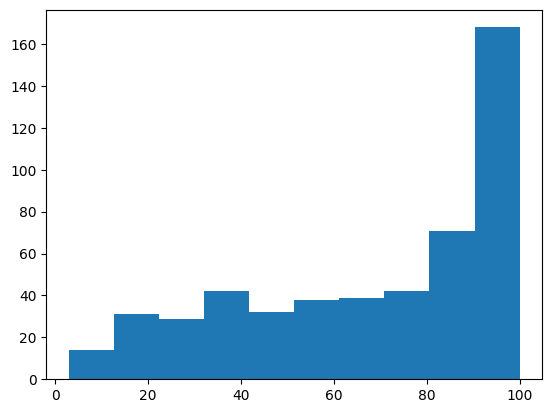

In [116]:
#Histograma
plt.hist(boston_df['AGE'])

C:\Users\Maria\AppData\Local\Temp\ipykernel_7768\957542206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(boston_df['AGE'])


<Axes: xlabel='AGE', ylabel='Density'>

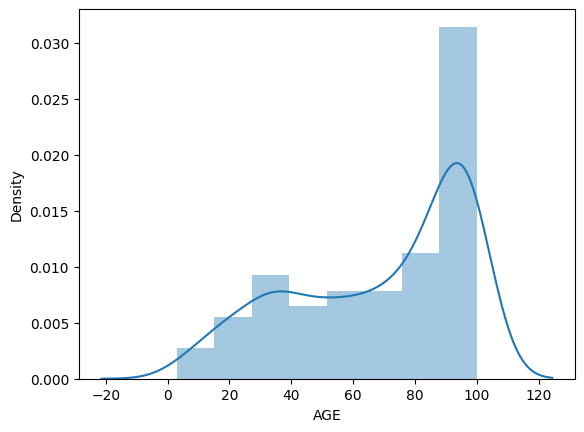

In [118]:
#En lo siguiente además de darnos un histograma, nos muestra la distribución
sb.distplot(boston_df['AGE'])